## YingYang ✨ Flood Fill

Draw an ying-yang model and fill `continuos parts`.

In [ ]:
%pip install pillow

## Draw Model

Draw the ying-yang image `without fill`.

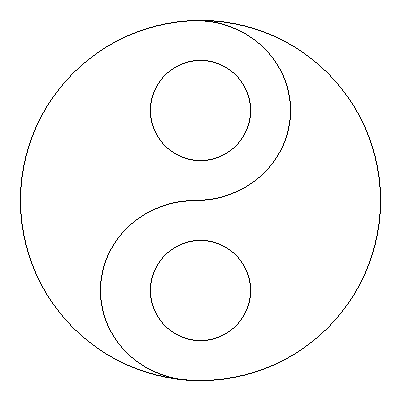

In [4]:
from PIL import Image, ImageDraw
from IPython.display import display

# Create a new blank image
image = Image.new("RGB", (400, 400), "white")

# Create a drawing object
draw = ImageDraw.Draw(image)

# Draw the outer circle
draw.ellipse((20, 20, 380, 380), fill=None, outline="black")

# Draw the inner circles
draw.ellipse((150, 60, 250, 160), fill=None, outline="black")
draw.ellipse((150, 240, 250, 340), fill=None, outline="black")

# Draw the curved median lines
draw.arc((100, 20, 290, 200), -90, 90, fill="black")
draw.arc((100, 200, 290, 380), 90, 270, fill="black")

# Display the image inline
display(image)

## Image Label

Display the new `image draw` to a window by adding to a label widget.

In [9]:
import tkinter as tk
from PIL import Image, ImageTk, ImageDraw

def draw_YingYang(image):

    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Draw one outer circle and two inner circles
    draw.ellipse((20, 20, 380, 380), fill=None, outline="black")
    draw.ellipse((150, 60, 250, 160), fill=None, outline="black")
    draw.ellipse((150, 240, 250, 340), fill=None, outline="black")

    # Draw the curved median lines (linked together)
    draw.arc((100, 20, 290, 200), -90, 90, fill="black")
    draw.arc((100, 200, 290, 380), 90, 270, fill="black")

# Create a Tkinter window
window = tk.Tk()
window.title("Ying-Yang / Image Fill")

# Create a new blank image (that will be add to window's widget)
image = Image.new("RGB", (400, 400), "white")

# Draw ying-yang
draw_YingYang(image) # Look Here

# Tkinter compatible photo image (for window label)
photo = ImageTk.PhotoImage(image)
image_label = tk.Label(window, image=photo)
image_label.pack()

# Start the Tkinter event loop
window.mainloop()

## Flood Fill / Recursive

Filling the model using recursion approach soon reaches `stack overflow` limits.       

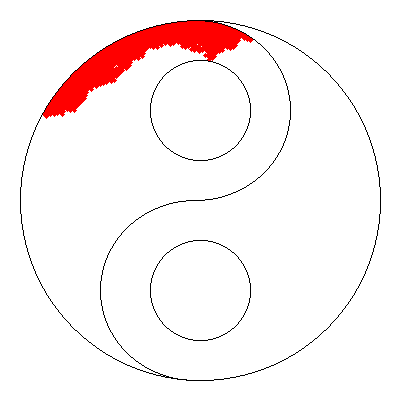

In [1]:
import tkinter as tk
from PIL import Image, ImageTk, ImageDraw

def draw_YingYang(image):
    draw = ImageDraw.Draw(image)
    
    draw.ellipse((20, 20, 380, 380), fill=None, outline="black")
    draw.ellipse((150, 60, 250, 160), fill=None, outline="black")
    draw.ellipse((150, 240, 250, 340), fill=None, outline="black")
    draw.arc((100, 20, 290, 200), -90, 90, fill="black")
    draw.arc((100, 200, 290, 380), 90, 270, fill="black")

# Fill cells one by one
def floodF_YingYang(start, stack=0, stopFlood=False):
    j, i = start

    if stopFlood == True:
        return

    if (stack > 2900): # stack overflow limits (around 2900)
        stopFlood = True
        return

    # Fill the cell with color
    boundaries = (i, j, i+1, j+1)
    image.paste('red', boundaries)

    # Update the displayed image after each fill operation
    photo = ImageTk.PhotoImage(image)
    image_label.configure(image=photo)
    image_label.image = photo
    window.update()
    
    # Neighbors coordinates
    W = j, i-1
    N = j-1, i
    E = j, i+1
    S = j+1, i

    for X in [W, N, E, S]:
        j, i = X
        boundaries = (i, j, i+1, j+1)
        c = image.crop(boundaries).getpixel((0, 0)) # get color (RGB)

        if c == (255, 255, 255): # white
            floodF_YingYang(X, stack+1) # Recursive

# Create a Tkinter window
window = tk.Tk()
window.title("Ying-Yang / Image Fill")

# Create a new blank image (that will be add to window's widget)
image = Image.new("RGB", (400, 400), "white")

# Draw ying-yang
draw_YingYang(image)

# Tkinter compatible photo image (for window label)
photo = ImageTk.PhotoImage(image)
image_label = tk.Label(window, image=photo)
image_label.pack()

# Start flood
floodF_YingYang((30, 180))

# Display the image inline
display(image)

## Flood Fill / Iterative

Paste the image with `two colors` delimited by median line.  

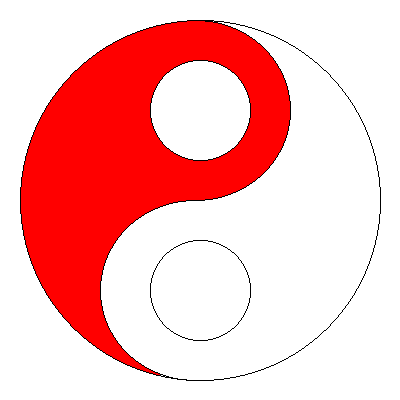

In [1]:

from PIL import Image, ImageTk, ImageDraw

def draw_YingYang(image):
    draw = ImageDraw.Draw(image)
    draw.ellipse((20, 20, 380, 380), fill=None, outline="black")
    draw.ellipse((150, 60, 250, 160), fill=None, outline="black")
    draw.ellipse((150, 240, 250, 340), fill=None, outline="black")
    draw.arc((100, 20, 290, 200), -90, 90, fill="black")
    draw.arc((100, 200, 290, 380), 90, 270, fill="black")

def floodF_YingYang(start):
    stack = [start]

    while stack:
        j, i = stack.pop() # assign last / remove from stack

        # Fill the cell with color
        image.paste('red', (i, j, i+1, j+1))
        
        # Neighbors coordinates
        for neighbor in [(j, i-1), (j-1, i), (j, i+1), (j+1, i)]:
            nj, ni = neighbor

            if 0 < nj < 400 and 0 < ni < 400:
                c = image.crop((ni, nj, ni+1, nj+1)).getpixel((0, 0)) # neighbor color

                if c == (255, 255, 255): # is not colored
                    stack.append((nj, ni))

# Create a new blank image (that will be add to window's widget)
image = Image.new("RGB", (400, 400), "white")

# Draw ying-yang
draw_YingYang(image)

# Fill each cell and update window
floodF_YingYang((30, 180))

# Save the image to a file
image.save("yingyang.png")

# Display the image inline
display(Image.open("yingyang.png"))

## Flood Fill / Iterative / v2

With the `pixel access object` for the images the program runs faster.


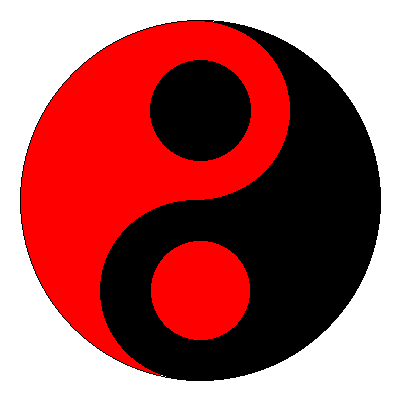

In [2]:
from PIL import Image, ImageTk, ImageDraw

RED = (255, 0, 0)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

def draw_YingYang(image):
    draw = ImageDraw.Draw(image)
    draw.ellipse((20, 20, 380, 380), fill=None, outline="black")
    draw.ellipse((150, 60, 250, 160), fill=None, outline="black")
    draw.ellipse((150, 240, 250, 340), fill=None, outline="black")
    draw.arc((100, 20, 290, 200), -90, 90, fill="black")
    draw.arc((100, 200, 290, 380), 90, 270, fill="black")

def floodF_YingYang(start, color):
    stack = [start]

    while stack:
        j, i = stack.pop() # assign last and remove from stack
        pixels = image.load() # pixel access object

        # Fill the cell with color
        pixels[i, j] = color
        
        # Neighbors coordinates
        for neighbor in [(j, i-1), (j-1, i), (j, i+1), (j+1, i)]:
            nj, ni = neighbor

            if 0 < nj < 400 and 0 < ni < 400:
                c = pixels[ni, nj] # neighbor color

                if c == WHITE: # not colored
                    stack.append((nj, ni))
    return

# Create a new blank image (that will be add to window's widget)
image = Image.new("RGB", (400, 400), WHITE)

# Draw ying-yang
draw_YingYang(image)

# Fill the model and update window
floodF_YingYang((30, 180), color=RED)       # left area
floodF_YingYang((30, 250), color=BLACK)     # right area
floodF_YingYang((100, 200), color=BLACK)    # top inner cirlcle
floodF_YingYang((300, 200), color=RED)      # bottom inner cirlcle

# Save the image to a file
image.save("yingyang.png")

# Display the image inline
display(Image.open("yingyang.png"))

## Flood Fill / Interactive GUI / v3

Give the user the choise to `select the color`.

In [3]:

import tkinter as tk
from PIL import Image, ImageTk, ImageDraw

RED = (255, 0, 0)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

def draw_YingYang(image):
    draw = ImageDraw.Draw(image)
    draw.ellipse((20, 20, 380, 380), fill=None, outline="black")
    draw.ellipse((150, 60, 250, 160), fill=None, outline="black")
    draw.ellipse((150, 240, 250, 340), fill=None, outline="black")
    draw.arc((100, 20, 290, 200), -90, 90, fill="black")
    draw.arc((100, 200, 290, 380), 90, 270, fill="black")

def floodF_YingYang(start, color):
    stack = [start]

    while stack:
        j, i = stack.pop() # assign last and remove from stack
        pixels = image.load() # pixel access object

        # Fill the cell with color
        pixels[i, j] = color
        
        # Neighbors coordinates
        for neighbor in [(j, i-1), (j-1, i), (j, i+1), (j+1, i)]:
            nj, ni = neighbor

            if 0 < nj < 400 and 0 < ni < 400:
                c = pixels[ni, nj] # neighbor color

                if c == WHITE: # not colored
                    stack.append((nj, ni))

    # Create a new photoImage with updated pixel data
    photo = ImageTk.PhotoImage(image)
    image_label.configure(image=photo)
    image_label.image = photo
    window.update()

# Create a Tkinter window
window = tk.Tk()
window.title("Ying-Yang / Image Fill")

# Create a new blank image (that will be add to window's widget)
image = Image.new("RGB", (400, 400), WHITE)

# Draw ying-yang
draw_YingYang(image)

# Create a Tkinter compatible photo image
photo = ImageTk.PhotoImage(image)

# Create a label widget to display the image
image_label = tk.Label(window, image=photo)
image_label.pack()
window.update()

# ---------------------------------------------------------

selected_color = None
colors = {
    'red': (255, 0, 0),
    'black': (0, 0, 0),
    'yellow': (255, 255, 0), 
    'blue': (0, 0, 255), 
}

# Labels fro color selection
for name, color in colors.items():
    label = tk.Label(window, bg=name, width=10)
    label.pack()
    label.bind("<Button-1>", lambda event, col=color: select_color(col))

def select_color(c):
    global selected_color
    selected_color = c

# Bind mouse click event on image label
image_label.bind("<Button-1>", lambda event: perform_flood_fill(event))

def perform_flood_fill(event):
    if selected_color != None:
        x = event.x
        y = event.y
        floodF_YingYang((y,x), color=selected_color)

def reset_colors():
    global image
    image = Image.new("RGB", (400, 400), WHITE)
    draw_YingYang(image)
    photo = ImageTk.PhotoImage(image)
    image_label.configure(image=photo)
    image_label.image = photo
    window.update()

# Reset button
reset_button = tk.Button(window, text='Reset', command=reset_colors)
reset_button.pack()

# ---------------------------------------------------------

# Start the Tkinter event loop
window.mainloop()

## References

[Flood Fill](https://en.wikipedia.org/wiki/Flood_fill) wikipedia